In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import pickle

from sklearn.metrics import auc, precision_recall_curve, roc_curve

plt.rcParams["font.family"] = "Times New Roman"

def get_style(label):
    # Hardcoded strings aren't fun, but at least they're quick
    linestyle = '-'
    if 'Lasso Regression' in label:
        color = 'b'
    elif 'Random Forest' in label:
        color = 'g'
    elif 'XGBoost' in label:
        color = 'r'
    elif 'Multi-layer Perceptron' in label:
        color = 'k'
    return color, linestyle

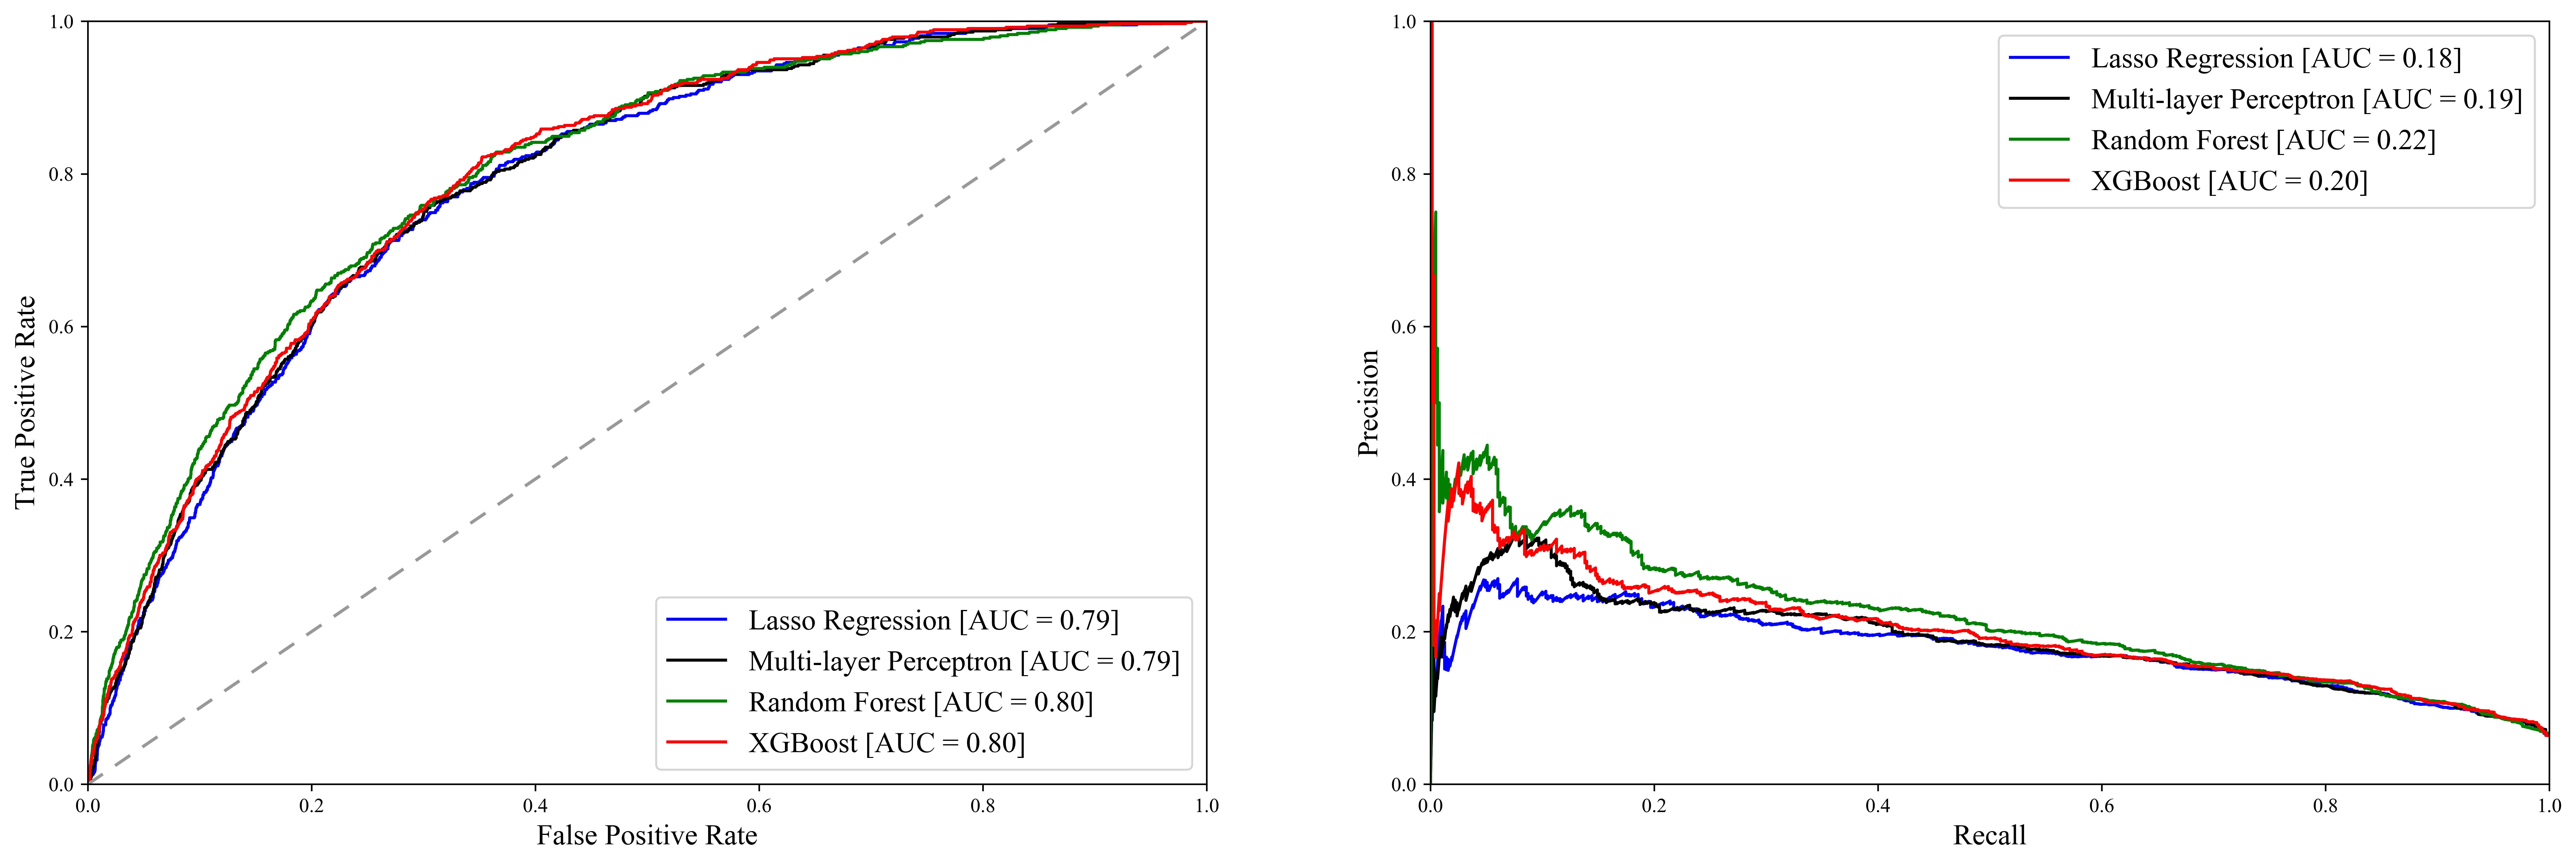

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,7), dpi=600)

for filename in sorted(os.listdir("./pickle")):
    with open("./pickle/" + filename, 'rb') as f:
        label, y_true, y_prob = pickle.load(f)

    color, linestyle = get_style(label)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    label_auc = ' [AUC = %0.2f]' % auc(fpr, tpr)
    ax1.plot(fpr, tpr, color=color, label=label+label_auc, linestyle=linestyle, linewidth=1.5)

    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    label_auc = ' [AUC = %0.2f]' % auc(recall, precision)
    ax2.plot(recall, precision, color=color, label=label+label_auc, linestyle=linestyle, linewidth=1.5)

    ax1.plot([0, 1], [0, 1], color='0.6', linestyle='--', dashes=(6,5))
    ax1.set(xlim=[0,1], ylim=[0,1])
    ax1.set_xlabel("False Positive Rate", fontsize='x-large')
    ax1.set_ylabel("True Positive Rate", fontsize='x-large')
    ax1.legend(loc='lower right', fontsize='x-large')
    ax2.set(xlim=[0,1], ylim=[0,1])
    ax2.set_xlabel("Recall", fontsize='x-large')
    ax2.set_ylabel("Precision", fontsize='x-large')
    ax2.legend(loc='upper right', fontsize='x-large')